### Predict the probability of a customer to order a product from the given currentbugroupname in the next 3 days (test period)

In [1]:
# importing necessary libraries
import os
import pandas as pd
import numpy as np
from functools import reduce

## 1. EDA and Data Cleaning

In this section general exploratory data analysis was done in order to understand the data. Moreover, data cleaning was performed.

### df_basket

In [2]:
df_basket = pd.read_csv('df_basket.csv')
df_basket.head(2)

,userid,contentid,partition_date,addtobasket_count
0,42366578,41474373,2020-10-31 03:00:00.000,1
1,35956834,43278838,2020-10-31 03:00:00.000,1


In [3]:
df_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406268 entries, 0 to 406267
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   userid             406268 non-null  int64 
 1   contentid          406268 non-null  int64 
 2   partition_date     406268 non-null  object
 3   addtobasket_count  406268 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 12.4+ MB


In [4]:
df_basket.isna().sum()

userid               0
contentid            0
partition_date       0
addtobasket_count    0
dtype: int64

In [5]:
df_basket.duplicated().any()

False

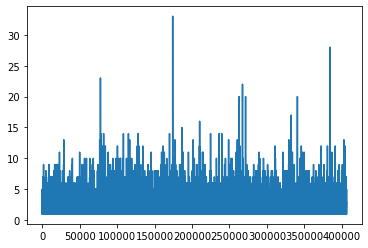

In [6]:
df_basket.addtobasket_count.plot();

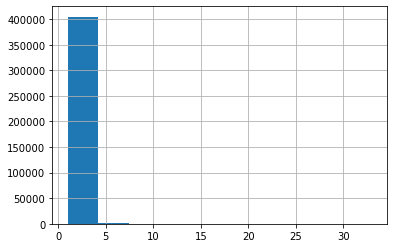

In [7]:
df_basket.addtobasket_count.hist();

### df_fav

In [8]:
df_fav = pd.read_csv('df_fav.csv')
df_fav.head(2)

,userid,contentid,partition_date,fav_count
0,17627638,32509331,2020-10-02 03:00:00.000,1
1,7757008,31759112,2020-10-08 03:00:00.000,1


In [9]:
df_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733827 entries, 0 to 733826
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          733827 non-null  int64 
 1   contentid       733827 non-null  int64 
 2   partition_date  733827 non-null  object
 3   fav_count       733827 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.4+ MB


In [10]:
df_fav.isna().sum()

userid            0
contentid         0
partition_date    0
fav_count         0
dtype: int64

In [11]:
df_fav.duplicated().any()

False

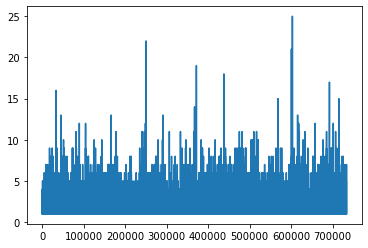

In [12]:
df_fav.fav_count.plot();

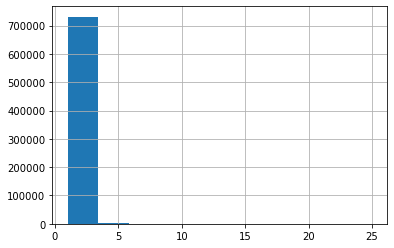

In [13]:
df_fav.fav_count.hist();

### df_visit

In [14]:
df_visit = pd.read_csv('df_visit.csv')
df_visit.head(2)

,userid,contentid,partition_date,productdetailcount
0,24692048,2837094.0,2020-10-04 03:00:00.000,1
1,24692048,33346848.0,2020-10-01 03:00:00.000,1


In [15]:
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14389920 entries, 0 to 14389919
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userid              int64  
 1   contentid           float64
 2   partition_date      object 
 3   productdetailcount  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 439.1+ MB


In [16]:
df_visit.isna().sum()/len(df_visit)

userid                0.000000
contentid             0.000021
partition_date        0.000000
productdetailcount    0.000000
dtype: float64

* The number of nan values for contentid are significantly small, thus we can drop them.

In [17]:
df_visit.dropna(inplace=True)

In [18]:
df_visit.duplicated().any()

False

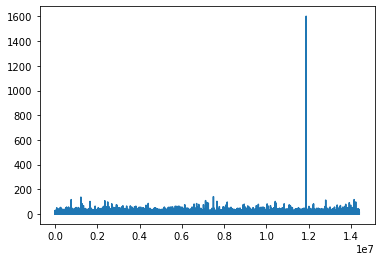

In [19]:
df_visit.productdetailcount.plot();

* It seems there is one anomoly in productdetailcount 

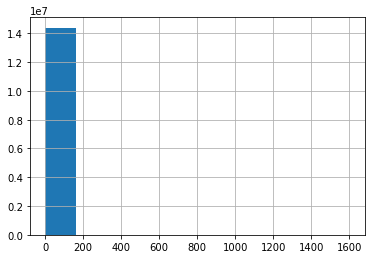

In [20]:
df_visit.productdetailcount.hist();

In [21]:
df_visit.describe()

,userid,contentid,productdetailcount
count,1.438962e+07,1.438962e+07,1.438962e+07
mean,1.583412e+07,3.567346e+07,1.521755e+00
std,1.029175e+07,1.525444e+07,1.507323e+00
min,1.281000e+04,4.867600e+04,1.000000e+00
25%,8.687280e+06,3.235575e+07,1.000000e+00
50%,1.379907e+07,3.940772e+07,1.000000e+00
75%,2.193210e+07,4.694214e+07,1.000000e+00
max,4.462565e+07,5.600082e+07,1.602000e+03


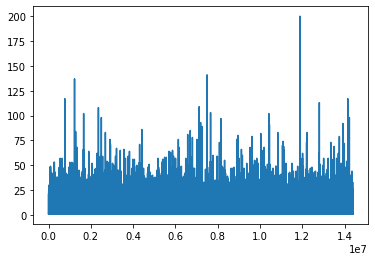

In [22]:
temp = df_visit.copy()
temp.loc[temp.productdetailcount>200, 'productdetailcount'] = 200
temp.productdetailcount.plot();

### df_trx

In [23]:
df_trx = pd.read_csv('df_trx.csv')
df_trx.head(2)

,userid,contentid,orderdate,quantity,price
0,16049866,49489653.0,2020-10-31 03:00:00.000,1,199.95
1,14167874,42484094.0,2020-10-31 03:00:00.000,1,69.99


In [24]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381536 entries, 0 to 381535
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userid     381536 non-null  int64  
 1   contentid  381525 non-null  float64
 2   orderdate  381536 non-null  object 
 3   quantity   381536 non-null  int64  
 4   price      381536 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.6+ MB


In [25]:
df_trx.isna().sum()

userid        0
contentid    11
orderdate     0
quantity      0
price         0
dtype: int64

In [26]:
df_trx[~df_trx.contentid.isna()].userid.unique().shape

(31027,)

In [27]:
df_trx.userid.unique().shape

(31027,)

* We won't lose any userid by droping these 11 nan values.

In [28]:
df_trx.dropna(inplace=True)

In [29]:
df_trx.duplicated().any()

True

In [30]:
df_trx.drop_duplicates(inplace=True)

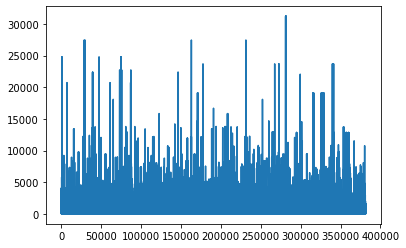

In [31]:
df_trx['total_pur'] = df_trx.groupby(['userid','orderdate']).price.transform('sum')
df_trx['total_pur'].plot();

In [32]:
df_trx['product_count'] = df_trx.groupby(['userid','orderdate']).contentid.transform('count')
df_trx['product_count'].shape

(378938,)

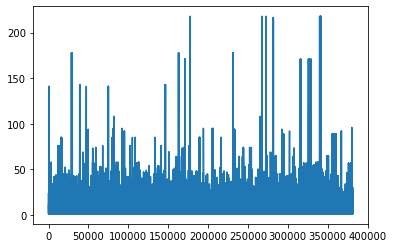

In [33]:
df_trx['product_count'].plot();

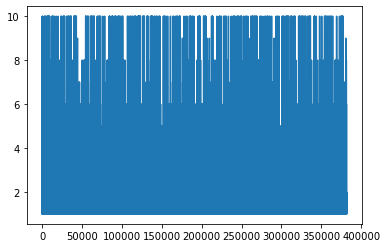

In [34]:
df_trx.quantity.plot();

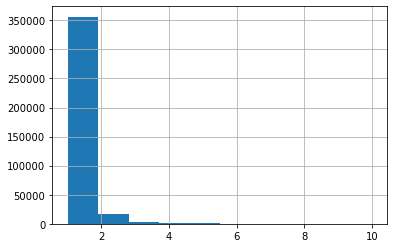

In [35]:
df_trx.quantity.hist();

<AxesSubplot:>

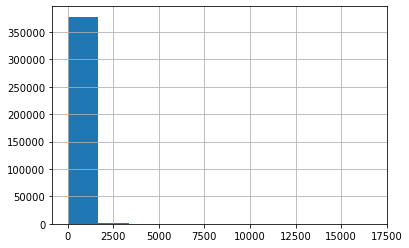

In [36]:
df_trx.price.hist()

### df_search_term

In [37]:
df_search_term = pd.read_csv('df_search_term.csv')
df_search_term.head(2)

,userid,partition_date,search_term
0,29474088,2020-10-05,tum urunler
1,29474088,2020-10-07,nike


In [38]:
df_search_term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281753 entries, 0 to 1281752
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   userid          1281753 non-null  int64 
 1   partition_date  1281753 non-null  object
 2   search_term     1281752 non-null  object
dtypes: int64(1), object(2)
memory usage: 29.3+ MB


In [39]:
df_search_term.isna().sum()

userid            0
partition_date    0
search_term       1
dtype: int64

* We will drop that one row nan in search_term column

In [40]:
df_search_term.dropna(inplace=True)

In [41]:
df_search_term.duplicated().any()

False

In [42]:
df_search_term.search_term.unique().shape

(373426,)

In [43]:
df_search_term.search_term.value_counts()

tum urunler                 90241
sweatshirt                   9830
bot                          8852
mont                         7089
elbise                       6136
                            ...  
madame coco çift kişilik        1
sleppy 2                        1
berberın                        1
qualıfe berberin                1
büstadidas                      1
Name: search_term, Length: 373426, dtype: int64

### df_product

In [44]:
df_product = pd.read_csv('df_product.csv')
df_product.head(2)

,contentid,currentbugroupname,brandid,gender,age,title,categoryname
0,40100964,Ayakkabı & Çanta,37787,Erkek,Yetişkin,Siyah Kauçuk Taban Büyük Numara Spor Ayakkab R...,Klasik Ayakkabı
1,40427970,Branded Tekstil,169,Kadın,Yetişkin,Kadın Siyah Çizgili Cepli Kuşaklı Pantolon,Pantolon


In [45]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441753 entries, 0 to 1441752
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   contentid           1441753 non-null  int64 
 1   currentbugroupname  1441753 non-null  object
 2   brandid             1441753 non-null  int64 
 3   gender              1220171 non-null  object
 4   age                 1130547 non-null  object
 5   title               1441165 non-null  object
 6   categoryname        1441753 non-null  object
dtypes: int64(2), object(5)
memory usage: 77.0+ MB


In [46]:
df_product.isna().sum()*100/len(df_product)

contentid              0.000000
currentbugroupname     0.000000
brandid                0.000000
gender                15.368929
age                   21.585251
title                  0.040784
categoryname           0.000000
dtype: float64

In [47]:
df_product.gender.value_counts()

Kadın     535505
Unisex    526134
Erkek     158532
Name: gender, dtype: int64

In [48]:
# Filling the NaNs with proper values
df_product.gender = df_product.gender.fillna('Unisex')
df_product.age = df_product.age.fillna('no_age')
df_product.title = df_product.title.fillna('UNKNOWN')

In [49]:
df_product.duplicated().any()

False

In [50]:
df_product.currentbugroupname.unique()

array(['Ayakkabı & Çanta', 'Branded Tekstil', 'FMCG', 'Ev', 'GAS', 'GM',
       'Elektronik', 'Kozmetik', 'Aksesuar & Saat & Gözlük',
       'Private Label', 'Mobilya', 'UNKNOWN', 'Digital Goods'],
      dtype=object)

In [51]:
df_product.categoryname.unique().shape

(2529,)

### df_demo

In [52]:
df_demo = pd.read_csv('df_demo.csv')
df_demo.head(2)

,userid,gender,age,tenure
0,9798852,Bayan,41.0,89
1,11413556,Bayan,33.0,61


In [53]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40807 entries, 0 to 40806
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userid  40807 non-null  int64  
 1   gender  40807 non-null  object 
 2   age     25204 non-null  float64
 3   tenure  40807 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ MB


In [54]:
df_demo.isna().sum()

userid        0
gender        0
age       15603
tenure        0
dtype: int64

In [55]:
df_demo.gender.value_counts()

Bayan               31202
Bay                  9378
UNKNOWN               218
kvkktalepsilindi        9
Name: gender, dtype: int64

In [56]:
df_demo.gender = df_demo.gender.replace('kvkktalepsilindi', 'UNKNOWN')

In [57]:
df_demo.duplicated().any()

False

In [58]:
df_demo.gender.value_counts()

Bayan      31202
Bay         9378
UNKNOWN      227
Name: gender, dtype: int64

In [59]:
df_demo.loc[(df_demo.age>200) | (df_demo.age<0), 'age'] = np.nan

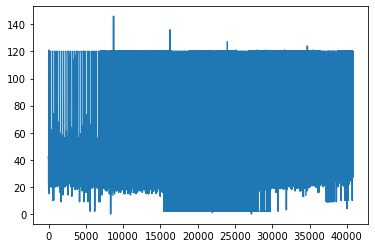

In [60]:
df_demo.age.plot();

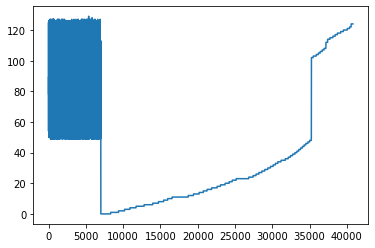

In [61]:
df_demo.tenure.plot();

* Note: There is a chance that at some point some part of demographic data which was sorted by "tenure" was concatinated with to the previous unsorted data.

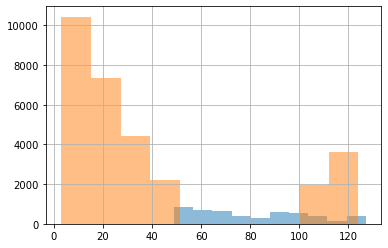

In [62]:
df_demo.tenure.head(5000).hist(alpha=0.5);
df_demo.tenure.tail(30000).hist(alpha=0.5);

* The distribuion on tenure seems fine; thus we will use it as an attribute.

### df_target_train

In [63]:
df_target_train = pd.read_csv('df_target_train.csv')
df_target_train.head(2)

,userid,currentbugroupname
0,28704634,GM
1,13506108,Ev


In [64]:
df_target_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27086 entries, 0 to 27085
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              27086 non-null  int64 
 1   currentbugroupname  24734 non-null  object
dtypes: int64(1), object(1)
memory usage: 423.3+ KB


In [65]:
df_target_train.currentbugroupname.unique()

array(['GM', 'Ev', nan, 'Mobilya', 'Kozmetik', 'Aksesuar & Saat & Gözlük',
       'Private Label', 'FMCG', 'Ayakkabı & Çanta', 'GAS',
       'Branded Tekstil', 'Elektronik', 'Digital Goods'], dtype=object)

In [66]:
df_target_train.isna().sum()/len(df_target_train)

userid                0.000000
currentbugroupname    0.086835
dtype: float64

In [67]:
df_target_train[df_target_train.isna()]

,userid,currentbugroupname
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
27081,NaN,NaN
27082,NaN,NaN
27083,NaN,NaN
27084,NaN,NaN


* They are all empty rows. We can drop them.

In [68]:
df_target_train.dropna(inplace=True)

In [69]:
df_target_train.duplicated().any()

False

In [70]:
df_target_train.currentbugroupname.value_counts()

Branded Tekstil             5218
FMCG                        4205
GM                          3350
Ev                          2674
Private Label               1988
Ayakkabı & Çanta            1863
Elektronik                  1786
Kozmetik                    1357
GAS                          896
Aksesuar & Saat & Gözlük     773
Mobilya                      565
Digital Goods                 59
Name: currentbugroupname, dtype: int64

In [71]:
df_target_train.userid.unique().shape

(18050,)

### df_test

In [72]:
df_test = pd.read_csv('df_test.csv')
df_test.head(2)

,userid,currentbugroupname,probability,target
0,20152944,Private Label,NaN,NaN
1,6662068,Private Label,NaN,NaN


In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244836 entries, 0 to 244835
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userid              244836 non-null  int64  
 1   currentbugroupname  244836 non-null  object 
 2   probability         0 non-null       float64
 3   target              0 non-null       float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.5+ MB


In [74]:
df_test.isna().sum()

userid                     0
currentbugroupname         0
probability           244836
target                244836
dtype: int64

In [75]:
df_test.duplicated().any()

False

In [76]:
df_test.userid.unique().shape

(20403,)

In [77]:
df_test.currentbugroupname.unique()

array(['Private Label', 'Kozmetik', 'Ev', 'Branded Tekstil',
       'Ayakkabı & Çanta', 'Elektronik', 'GM', 'FMCG', 'Mobilya', 'GAS',
       'Aksesuar & Saat & Gözlük', 'Digital Goods'], dtype=object)

## 2. Data Wrangling

In [78]:
# renaming some attributes
df_basket = df_basket.rename(columns = {'partition_date':'basketdate'})
df_fav = df_fav.rename(columns = {'partition_date':'favdate'})
df_visit = df_visit.rename(columns = {'partition_date':'visitdate'})
df_search_term = df_search_term.rename(columns = {'partition_date':'searchdate'})
df_product = df_product.rename(columns = {'gender':'gender_product','age':'age_product'})
df_target_train = df_target_train.rename(columns = {'currentbugroupname':'target'})

### 2.1 Finding currentbugroupname and categoryname for search terms in df_search_term

In [81]:
df_product_temp = df_product.copy()
strcols = ['currentbugroupname','categoryname']

# making a new column called "description" by row-wise joining the strings in 'currentbugroupname' and 'categoryname'
df_product_temp['description'] = df_product_temp[strcols].apply(lambda x: ' '.join(x), axis=1)

# getting the unique search terms and product descriptions
descriptions = df_product_temp['description'].unique()
user_search = df_search_term.search_term.unique()

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizing the two text columns
vectorizer = TfidfVectorizer()
descriptions_vec = vectorizer.fit_transform(descriptions)
user_search_verc = vectorizer.transform(user_search)

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# performing a pairwise cosine similarity and construction its matrix as in a dataframe
df_cs = pd.DataFrame(cosine_similarity(user_search_verc, descriptions_vec))
df_cs['MAX'] = df_cs.max(axis=1)

In [84]:
# getting those descriptions that have similarity for any search term
df_cs = df_cs.loc[df_cs.MAX>0] 
relateds = df_cs.apply(lambda row: row[row == row.MAX].index[0], axis=1).reset_index()
relateds['search_term'] = relateds['index'].apply(lambda x: user_search[x])
relateds['descriptions'] = relateds[0].apply(lambda x: descriptions[x])

cbgnames = df_product_temp['currentbugroupname'].unique()

def get_currentbugroupname(x):
    c = [i for i in cbgnames if x[:len(i)]==i]
    return c[0], x[len(c[0])+1:]

# splitting descriptions into a column with values of toples containing categoryname and currentbugroupname
relateds['descriptions_splitted'] = relateds.descriptions.apply(get_currentbugroupname)

In [86]:
# assigning currentbugroupname and categoryname columns related to each search_term
relateds['currentbugroupname'] = relateds.descriptions_splitted.apply(lambda x: x[0])
relateds['categoryname'] = relateds.descriptions_splitted.apply(lambda x: x[1])
relateds = relateds[['search_term','currentbugroupname','categoryname']]

In [87]:
# replacing 'UNKNOWN' values in 'currentbugroupname' column with NaNs
relateds.loc[relateds.currentbugroupname=='UNKNOWN', 'currentbugroupname'] = np.nan

# filling those NaNs with their proper value by grouping over 'categoryname'
relateds['currentbugroupname'] = relateds.groupby('categoryname').currentbugroupname.fillna(lambda x: x.mode())
relateds

,search_term,currentbugroupname,categoryname
0,güneş gözlüğü,GM,Güneş Gözlüğü
1,elbise,GM,Elbise
2,toz deterjan,FMCG,Jel Deterjan
3,detarjan toz,GM,Toz Deterjanı
4,temizlik seti,Ev,Temizlik Seti
...,...,...,...
216471,parfüm doldurucu,GM,Parfüm
216472,emaye kap,Branded Tekstil,Kap & Ferace
216473,elle ayakkabı,Ayakkabı & Çanta,Ayakkabı Bakım
216474,ananaslı kazak,Elektronik,Kazak


* The table above is the results of my similarity search in order to assign currentbugroupname and categoryname for each seart_term.

In [88]:
# updating df_search_term with the new info gained
df_search_term_updated = pd.merge(df_search_term, relateds, how='left', on='search_term')

,userid,searchdate,search_term,currentbugroupname,categoryname
0,29474088,2020-10-05,tum urunler,NaN,NaN
1,29474088,2020-10-07,nike,NaN,NaN
2,29474088,2020-10-07,hummel hmlkansas,NaN,NaN
3,29474088,2020-10-07,adidas superstar,NaN,NaN
4,29474088,2020-10-09,tum urunler,NaN,NaN
...,...,...,...,...,...
1281747,2929836,2020-10-10,büstadidas,NaN,NaN
1281748,2929836,2020-10-06,evony çocuk,GM,Çocuk Halısı
1281749,2929836,2020-10-11,tum urunler,NaN,NaN
1281750,2929836,2020-10-10,adidas,NaN,NaN


In [89]:
# df_search_term_updated.to_csv('df_search_term_updated.csv', index=False)
df_search_term_updated = pd.read_csv('df_search_term_updated.csv')
df_search_term_updated.isna().sum()/len(df_search_term_updated)

userid                0.000000
searchdate            0.000000
search_term           0.000000
currentbugroupname    0.367599
categoryname          0.367599
dtype: float64

* We were able to find the currentbugroupname and categoryname for almost 64 percent of the search terms.

In [90]:
# counting the number of search for each currentbugroupname done by each user
df_search_term = df_search_term_updated.groupby(['userid','currentbugroupname']).searchdate.nunique().reset_index()
df_search_term = df_search_term.rename(columns={'searchdate':'searchdate_count'})
df_search_term

,userid,currentbugroupname,searchdate_count
0,12810,Elektronik,3
1,12810,Ev,7
2,12810,FMCG,3
3,12810,GAS,6
4,12810,GM,17
...,...,...,...
127867,44611269,Branded Tekstil,1
127868,44611269,GM,1
127869,44621771,GM,1
127870,44625651,Ayakkabı & Çanta,1


### 3.2 Merge tables

In [91]:
# merging tables
merged_trx = reduce(lambda left, right: pd.merge(left,right,on=['userid','contentid'], how='outer'), 
                    [df_basket, df_fav, df_visit, df_trx])

merged = pd.merge(merged_trx, df_product, on='contentid', how='left')

# there is no 'UNKNOWN' value for currentbugroupname in the test set; thus we will ignore these data points.
merged = merged[merged.currentbugroupname!='UNKNOWN']

In [92]:
# making a new dataframe which would have all unique values in currentbugroupname for all users in the train set
currentbugroupnames = df_target_train.target.unique()
n_cgn = currentbugroupnames.shape[0]
newdf = pd.DataFrame(np.repeat(df_target_train.values, n_cgn, axis=0))
newdf.columns = df_target_train.columns

v = pd.Series(currentbugroupnames)
newdf['currentbugroupname'] = np.tile(v, len(newdf) // len(v) + 1)[:len(newdf)]

In [93]:
df_target = newdf.copy()
# for each user, if they have bought from a currentbugroupname, we put 1 in our target column.
df_target['target'] = df_target.apply(lambda x: 1 if x.currentbugroupname==x.target else 0, axis=1)

In [94]:
merged_trg = pd.merge(merged, df_target, on=['userid','currentbugroupname'], how='right')

# filling NaNs in some of categorical columns with 'UNKNOWN'
merged_trg[['brandid','gender_product','age_product','title','categoryname','contentid']] = merged_trg[['brandid',
                                    'gender_product','age_product','title','categoryname','contentid']].fillna('UNKNOWN')

In [95]:
# two temperary dataframes to count for some columns and sum for some others
temp_count = merged_trg.groupby(['userid','currentbugroupname'])[['contentid','basketdate','favdate','visitdate','orderdate'
                                                ,'brandid','categoryname']].nunique().add_suffix('_count').reset_index()

temp_sum = merged_trg.groupby(['userid','currentbugroupname'])[['addtobasket_count','fav_count','productdetailcount','orderdate'
                                                            ,'quantity','price']].sum().add_suffix('_sum').reset_index()

In [96]:
# merging the two
new_train = pd.merge(temp_count, temp_sum, on=['userid','currentbugroupname'])

In [97]:
# merge the new dataframe with df_target, df_demo, and df_search_term with their relative common columns
df_train = pd.merge(new_train, df_target, on=['userid','currentbugroupname'], how='right')
df_train = pd.merge(df_train, df_demo, on=['userid'], how='left')
df_train = pd.merge(df_train, df_search_term, on=['userid','currentbugroupname'], how='left')
df_train.fillna(0, inplace=True)

In [98]:
from sklearn import preprocessing
import joblib
# perform label encoding on categorical columns. We will keep these fitted models to encode the same 
# categorical columns in the final test set.
le_cgb = preprocessing.LabelEncoder()
le_cgb.fit(df_train['currentbugroupname'])
df_train['currentbugroupname'] = le_cgb.transform(df_train['currentbugroupname'])
# for later use
joblib.dump(le_cgb, 'le_cgb.pkl')

le_gnd = preprocessing.LabelEncoder()
le_gnd.fit(df_train['gender'])
df_train['gender'] = le_gnd.transform(df_train['gender'])

In [99]:
# a glimpse of final df_train
df_train.head()

,userid,currentbugroupname,contentid_count,basketdate_count,favdate_count,visitdate_count,orderdate_count,brandid_count,categoryname_count,addtobasket_count_sum,fav_count_sum,productdetailcount_sum,quantity_sum,price_sum,target,gender,age,tenure,searchdate_count
0,28704634.0,8,18,0,0,4,1,8,3,0.0,0.0,42.0,3.0,162.15,1,0,22.0,10,3.0
1,28704634.0,5,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.00,0,0,22.0,10,2.0
2,28704634.0,10,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.00,0,0,22.0,10,0.0
3,28704634.0,9,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.00,0,0,22.0,10,0.0
4,28704634.0,0,1,0,0,1,0,1,1,0.0,0.0,1.0,0.0,0.00,0,0,22.0,10,0.0


In [100]:
# the same procedure as for the train data
merged_test = pd.merge(merged, df_test, on=['userid','currentbugroupname'], how='right')
merged_test[['brandid','gender_product','age_product','title','categoryname','contentid']] = merged_test[['brandid',
                                    'gender_product','age_product','title','categoryname','contentid']].fillna('UNKNOWN')

temp_count = merged_test.groupby(['userid','currentbugroupname'])[['contentid','basketdate','favdate','visitdate','orderdate'
                                                ,'brandid','categoryname']].nunique().add_suffix('_count').reset_index()

temp_sum = merged_test.groupby(['userid','currentbugroupname'])[['addtobasket_count','fav_count','productdetailcount','orderdate'
                                                            ,'quantity','price']].sum().add_suffix('_sum').reset_index()

new_test = pd.merge(temp_count, temp_sum, on=['userid','currentbugroupname'])

df_test = pd.merge(new_test, df_test, on=['userid','currentbugroupname'], how='right')
df_test = pd.merge(df_test, df_demo, on=['userid'], how='left')
df_test = pd.merge(df_test, df_search_term, on=['userid','currentbugroupname'], how='left')
df_test.fillna(0, inplace=True)

In [101]:
# using the fitted label encoder to transform
df_test['currentbugroupname'] = le_cgb.transform(df_test['currentbugroupname'])
df_test['gender'] = le_gnd.transform(df_test['gender'])

In [102]:
# a glimpse of final df_test
df_test.head()

,userid,currentbugroupname,contentid_count,basketdate_count,favdate_count,visitdate_count,orderdate_count,brandid_count,categoryname_count,addtobasket_count_sum,fav_count_sum,productdetailcount_sum,quantity_sum,price_sum,probability,target,gender,age,tenure,searchdate_count
0,20152944,11,50,0,1,8,1,2,9,0.0,7.0,100.0,4.0,169.98,0.0,0.0,1,25.0,21,0.0
1,6662068,11,14,0,0,5,1,1,7,0.0,0.0,44.0,2.0,219.98,0.0,0.0,1,0.0,104,0.0
2,11941706,11,91,0,0,12,1,2,18,0.0,0.0,156.0,2.0,159.98,0.0,0.0,1,0.0,55,0.0
3,12406170,11,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1,120.0,50,0.0
4,20939786,11,3,0,0,2,0,1,3,0.0,0.0,8.0,0.0,0.00,0.0,0.0,0,120.0,19,0.0


In [103]:
# df_train.to_csv('df_train_final.csv', index=False)

In [104]:
# df_test.to_csv('df_test_final.csv', index=False)

## 3. Modeling

### 3.1. 5-Fold CrossValidation

In [105]:
import random

# splitting the unique userids into five random samples
unique_users = df_train.userid.unique()

def population_sampler(population, k):
    random.shuffle(population)
    return [population[i::k] for i in range(k)]

folds = population_sampler(unique_users, 5)

In [106]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, RepeatedEditedNearestNeighbours
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as auc
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier


# using VotingClassifier with softvoting with tree models within 
estimators = [('lgbm', LGBMClassifier(verbose=-1)), 
             ('catboost', CatBoostClassifier(verbose=False)),
             ('hgbc', HistGradientBoostingClassifier())]

i = 1
for fold in folds:
    print (' ')
    print('Training on fold-%s...\n'%i)
    # in each fold we get the data for those unique userids in the fold.
    train = df_train[df_train.userid.isin(fold)]
    test = df_train[~(df_train.userid.isin(fold))]

    X_train = train.drop(['target','userid'], axis=1)
    y_train = train.target

    X_test = test.drop(['target','userid'], axis=1)
    y_test = test.target

    # after multiple trials using differnet methods in order to overcome unbalaned data, 
    # the RandomOverSampler was used for oversampling the minority class (class 0), and 
    # RepeatedEditedNearestNeighbours algorithm was considered for undersampling the majority class. 
    over = RandomOverSampler(sampling_strategy=0.6)
    under = RepeatedEditedNearestNeighbours(sampling_strategy='majority',kind_sel='all')
    # constructing the pipline
    steps = [('over', over), ('under', under)]
    pipeline = Pipeline(steps=steps)
    X_train_over, y_train_over = pipeline.fit_resample(X_train, y_train)

    vc = VotingClassifier(estimators=estimators, voting='soft')
    vc.fit(X_train_over, y_train_over)
    y_hat = vc.predict(X_test)

    print(classification_report(y_test, y_hat))
    print('ROC_AUC Score : %.3f \t'%auc(y_test, y_hat))
    print('-'*55)
    i += 1

 
Training on fold-1...

              precision    recall  f1-score   support

           0       0.96      0.70      0.81    218218
           1       0.17      0.66      0.27     19838

    accuracy                           0.70    238056
   macro avg       0.56      0.68      0.54    238056
weighted avg       0.89      0.70      0.76    238056

ROC_AUC Score : 0.683 	
-------------------------------------------------------
 
Training on fold-2...

              precision    recall  f1-score   support

           0       0.96      0.70      0.81    217987
           1       0.17      0.67      0.27     19817

    accuracy                           0.70    237804
   macro avg       0.56      0.68      0.54    237804
weighted avg       0.89      0.70      0.76    237804

ROC_AUC Score : 0.685 	
-------------------------------------------------------
 
Training on fold-3...

              precision    recall  f1-score   support

           0       0.96      0.71      0.81    216524
  

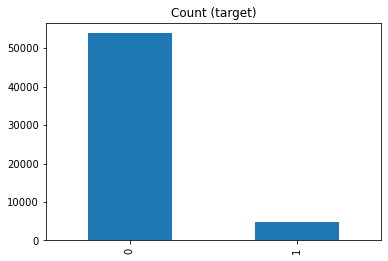

In [107]:
y_train.value_counts().plot(kind='bar', title='Count (target)');

* The number of classes in the last fold before performing oversampling and undersampling

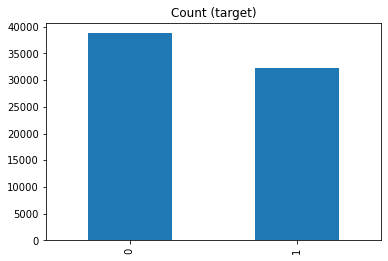

In [108]:
y_train_over.value_counts().plot(kind='bar', title='Count (target)');

* The number of classes in the last fold after performing oversampling and undersampling

### 3.2 Feature Importance using on one of the folds

In [109]:
# Feature importance on the last fold using CatBoostClassifier
cbc = CatBoostClassifier(verbose=False)
pool_train = Pool(X_train_over, y_train_over)
pool_test = Pool(X_test)
cbc.fit(pool_train)

importance = pd.DataFrame({'feature_importance': cbc.get_feature_importance(pool_train), 
              'feature_names': X_train_over.columns}).sort_values(by=['feature_importance'], ascending=False)
importance

,feature_importance,feature_names
0,30.421066,currentbugroupname
15,10.932698,tenure
10,10.088185,productdetailcount_sum
1,9.781868,contentid_count
14,6.151377,age
12,5.385649,price_sum
7,4.901108,categoryname_count
6,4.685672,brandid_count
4,4.436376,visitdate_count
16,3.909770,searchdate_count


### 4. Prediction

In [110]:
# considering df_train and df_test;
X = df_train.drop(['target','userid'], axis=1)
y = df_train.target

X_test = df_test.drop(['probability','target','userid'], axis=1)

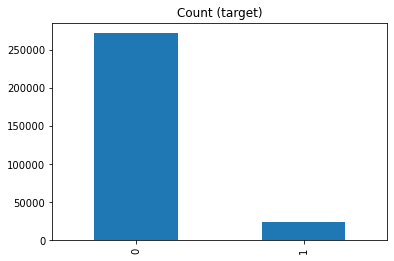

In [111]:
y.value_counts().plot(kind='bar', title='Count (target)');

* The number of classes in the train set before performing oversampling and undersampling

In [123]:
# handling unbalanced classes problem in the train data
over = RandomOverSampler(sampling_strategy=0.6)
under = RepeatedEditedNearestNeighbours(sampling_strategy='majority',kind_sel='all')
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
X_over, y_over = pipeline.fit_resample(X, y)

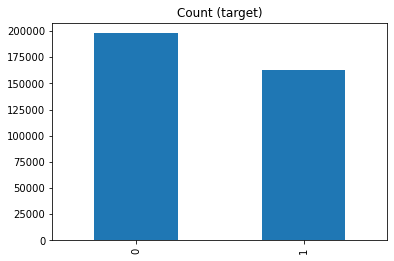

In [124]:
y_over.value_counts().plot(kind='bar', title='Count (target)');

* The number of classes in the train set after performing oversampling and undersampling

In [125]:
# using the same VotingClassifier for final predictions
vc = VotingClassifier(estimators=estimators, voting='soft')
vc.fit(X_over, y_over)
# getting the predictions
y_hat = vc.predict(X_test)
# getting the probability
y_proba = vc.predict_proba(X_test)

In [126]:
# constructing the final table
temp_pred = pd.DataFrame(y_proba, columns = cbc.classes_)
temp_pred['pred'] = y_hat
temp_pred['probability'] = temp_pred.apply(lambda x: x[x.pred], axis=1)

results = df_test[['userid','currentbugroupname']].copy()
results['probability'] = temp_pred['probability'].copy()
results['target'] = temp_pred['pred'].copy()
# le_cgb = joblib.load('le_cgb.pkl')
results['currentbugroupname'] = le_cgb.inverse_transform(results['currentbugroupname'])

In [134]:
results.to_csv('predictions.csv', index=False)